# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the datasets given
import requests
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/invrao/Internship/main/Evaluation%20Projects/Week1/avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns of data in this dataset

There the columns Date,Type,region columns are objective type (categorical), remaining all are numerical.

In [7]:
df.duplicated().any()

False

In [8]:
df.isin(['NAN','NA','N/A','-',' ','?','--']).sum().any()

False

No duplicate rows or  no white spaces present in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

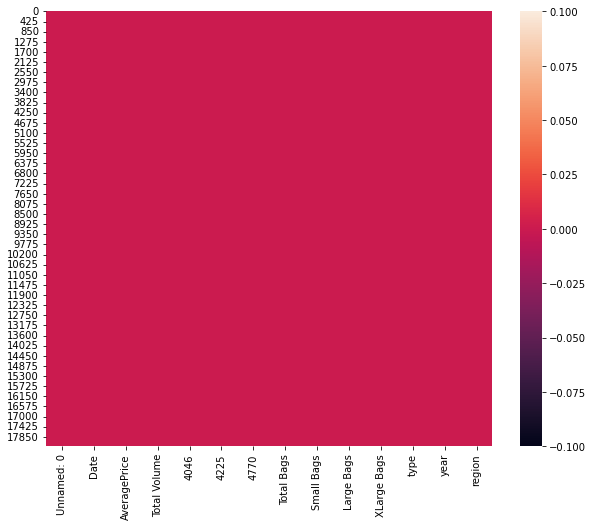

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

There are no Null values present in the dataset

In [12]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


XLarge Bags column has huge difference between 75% and Max values, there is high probability of Huge outliers in this column

In [13]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [14]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

This dataset is having the data of Avocados for 4 years and 54 Regions

In [15]:
df["year"].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

This data is in the range of years from 2015 to 2018

In [16]:
df["type"].unique()

array(['conventional', 'organic'], dtype=object)

There are two types of Avocados in the dataset conventional' and 'organic'

Observations:

•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold



In [17]:
df["Unnamed: 0"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [18]:
#We can remove the unnamed column
df = df.drop("Unnamed: 0",axis=1)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# VISUALISATION

# Univariate Analysis:

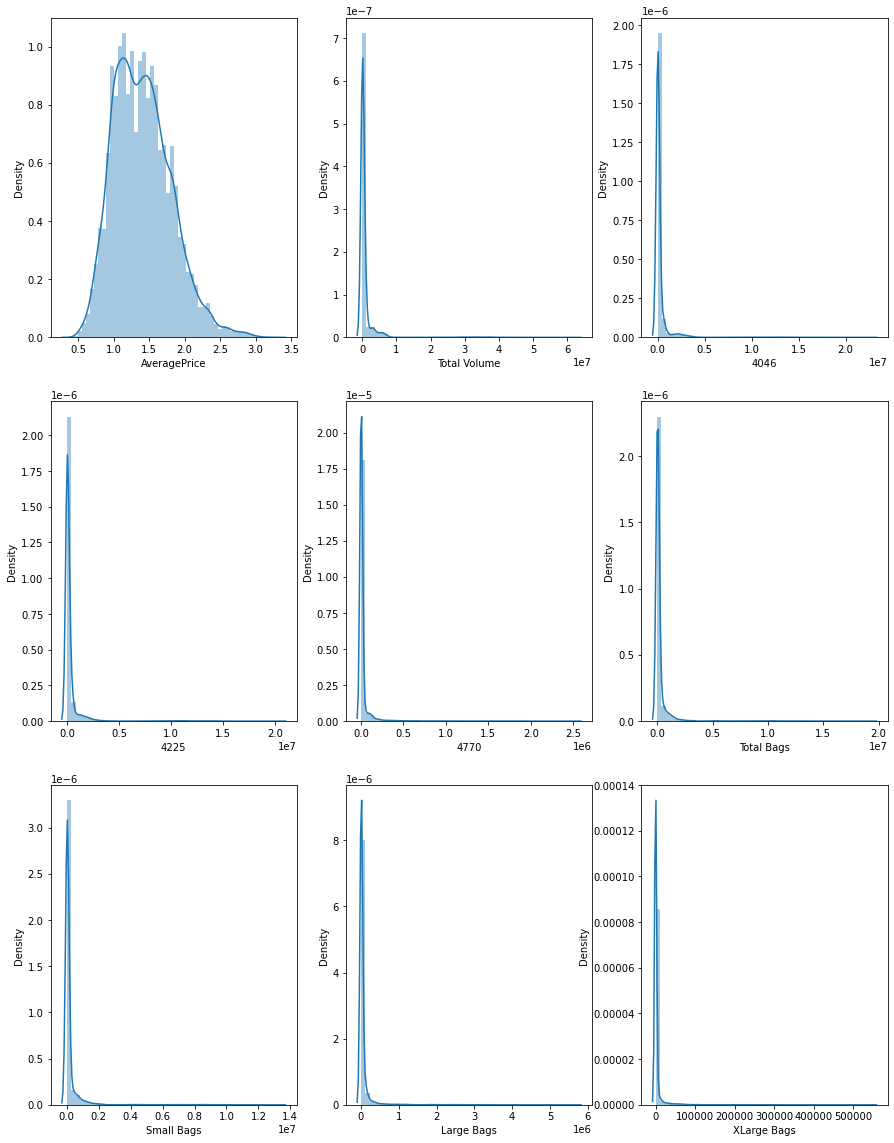

In [19]:
plt.figure(figsize=(15,20))
for i in enumerate(["AveragePrice","Total Volume","4046","4225","4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

In [20]:
#lets seperate the continuos and categorical columns
continuous_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

In [21]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

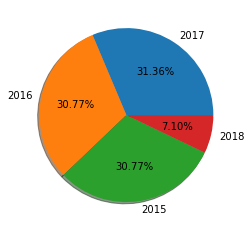

In [22]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

There is very less data for the year 2018

In [23]:
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

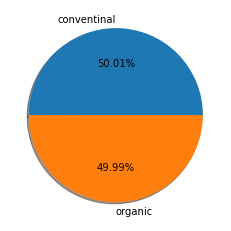

In [24]:
labels='conventinal','organic'
fig, ax = plt.subplots()
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Both type of avacados have almost same number of data observations

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

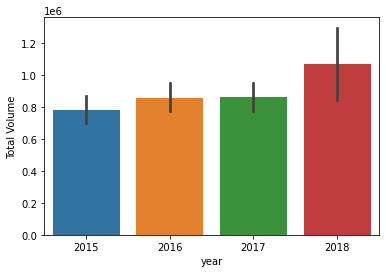

In [25]:
#Total sale volume by year
sns.barplot(y='Total Volume',x='year', data=df)

Sales are increasing year by year

# Bivariate Analysis:

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

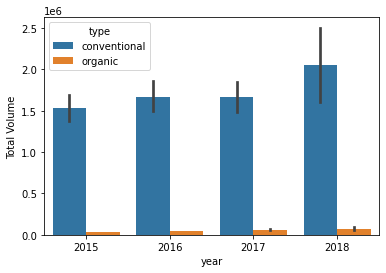

In [26]:
# Total sale by year by type
sns.barplot(y='Total Volume',x='year',hue='type', data=df)

Conventional avacados are selling huge when comapred to organic

In [27]:
df.groupby('year')['Total Volume'].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [28]:
#average Total sales by region
df.groupby('region')['Total Volume'].sum()

region
Albany                 1.606780e+07
Atlanta                8.860512e+07
BaltimoreWashington    1.347139e+08
Boise                  1.441319e+07
Boston                 9.727398e+07
BuffaloRochester       2.296247e+07
California             1.028982e+09
Charlotte              3.555554e+07
Chicago                1.337023e+08
CincinnatiDayton       4.452201e+07
Columbus               2.999336e+07
DallasFtWorth          2.084193e+08
Denver                 1.389025e+08
Detroit                6.342242e+07
GrandRapids            3.021174e+07
GreatLakes             5.896425e+08
HarrisburgScranton     4.180886e+07
HartfordSpringfield    5.067054e+07
Houston                2.031679e+08
Indianapolis           3.026339e+07
Jacksonville           2.879000e+07
LasVegas               5.437691e+07
LosAngeles             5.078965e+08
Louisville             1.609700e+07
MiamiFtLauderdale      9.767322e+07
Midsouth               5.083494e+08
Nashville              3.561209e+07
NewOrleansMobile     

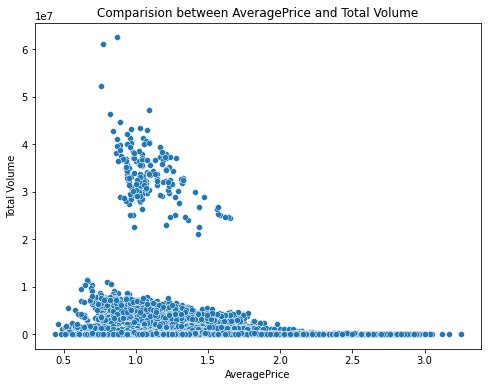

In [29]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.scatterplot(df['AveragePrice'],df['Total Volume']);

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

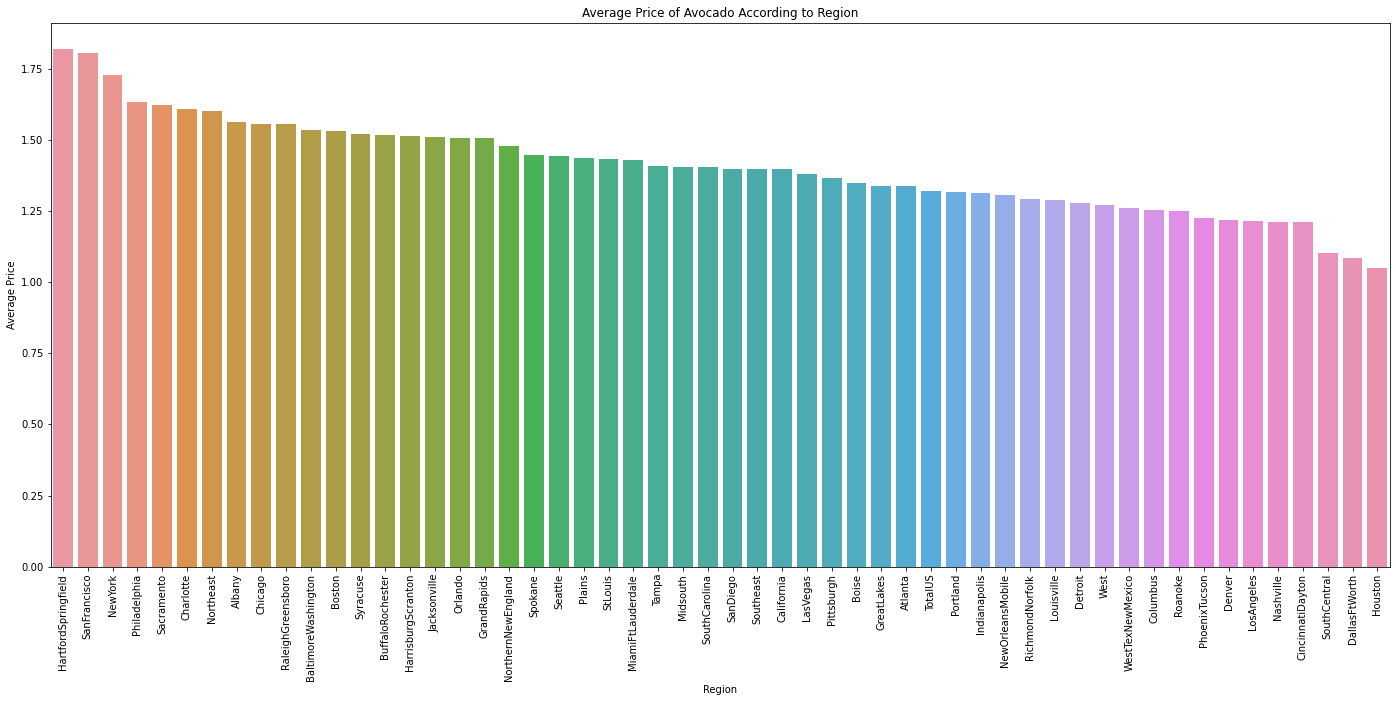

In [30]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

The regions where price is very high are: 

1. HartfordSpringfield

2. SanFrancisco

3. NewYork

4. Philadelphia

5. Sacramento

In [31]:
df.groupby(['region','type'])['AveragePrice'].mean().head(60)

region               type        
Albany               conventional    1.348757
                     organic         1.773314
Atlanta              conventional    1.068817
                     organic         1.607101
BaltimoreWashington  conventional    1.344201
                     organic         1.724260
Boise                conventional    1.076036
                     organic         1.620237
Boston               conventional    1.304379
                     organic         1.757396
BuffaloRochester     conventional    1.382308
                     organic         1.651361
California           conventional    1.105444
                     organic         1.685207
Charlotte            conventional    1.275089
                     organic         1.936982
Chicago              conventional    1.369349
                     organic         1.744201
CincinnatiDayton     conventional    1.015503
                     organic         1.402899
Columbus             conventional    1.066272


Volume Vs Avg Price

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

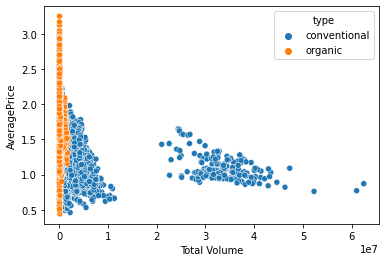

In [32]:
sns.scatterplot('Total Volume','AveragePrice',hue='type',data=df)

Organic avacado price is high compared to conventional

([<matplotlib.axis.YTick at 0x17086243cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

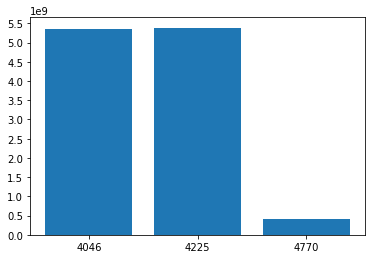

In [33]:
# Avacado category wise

plt.bar(  ['4046','4225','4770'],[df['4046'].sum(),df['4225'].sum(),df['4770'].sum()])
plt.yticks(range(1,6000000000,500000000))

4046 and 4225 are sold most and 4770 type is very less

Average avacado sales per year

In [34]:
# how much avacaddo sell per year

df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

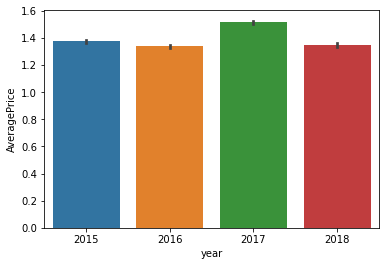

In [35]:
sns.barplot(x='year',y='AveragePrice',data=df)

Average Price is almost same all the years, but 2017 is little higher

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

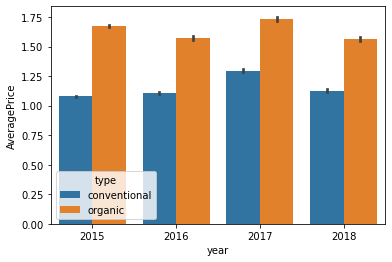

In [36]:
# Total sale by year by type
sns.barplot(y='AveragePrice',x='year',hue='type', data=df)

Lets check during which months the consumption / prices are high

In [37]:
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df['Date'].dt.month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [39]:
df['Month']=df['Date'].dt.month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

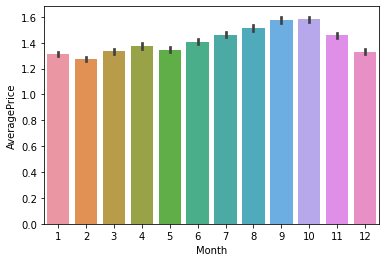

In [40]:
sns.barplot('Month','AveragePrice',data=df)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

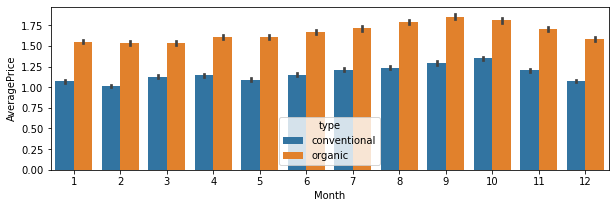

In [41]:
plt.figure(figsize=(10,3))
sns.barplot('Month','AveragePrice',hue='type',data=df)

Average prcie of avacado are high during september and October

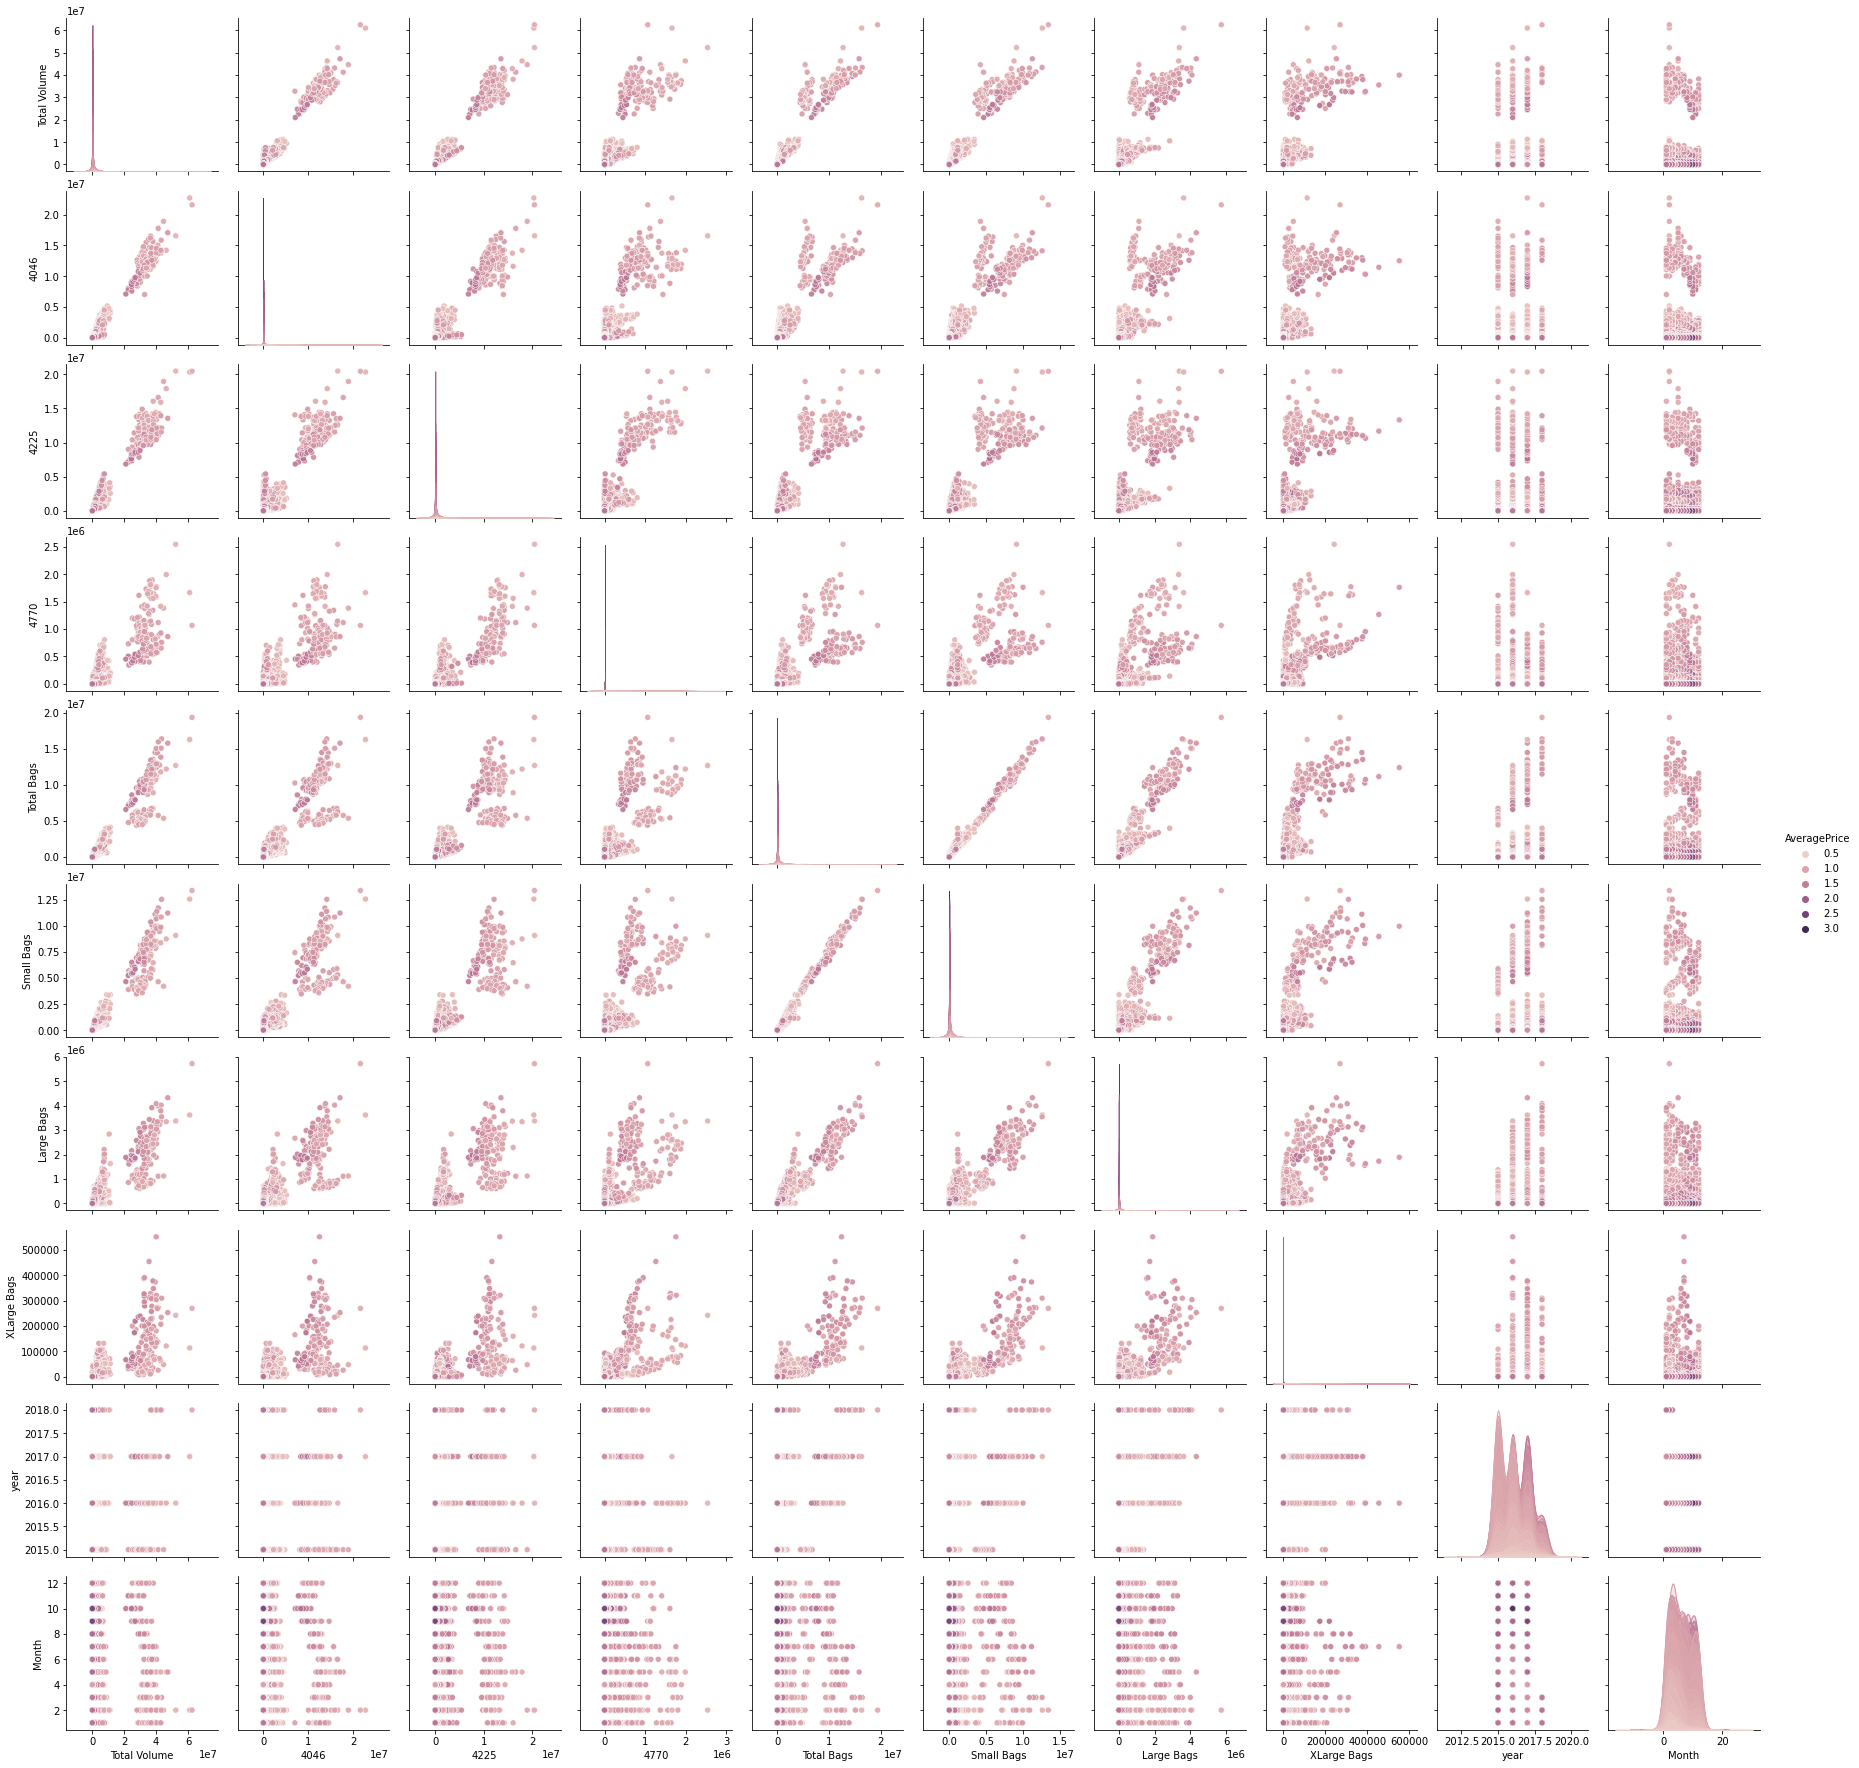

In [42]:
#pair plot
sns.pairplot(df,hue="AveragePrice")

In [43]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


<AxesSubplot:>

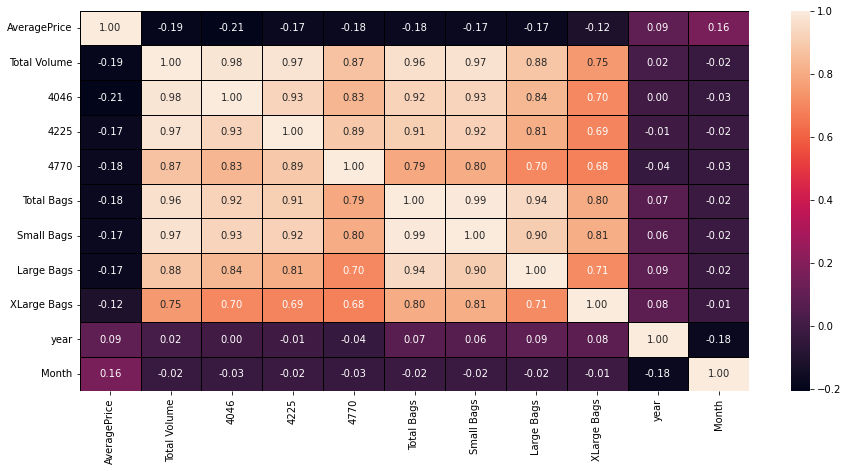

In [44]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='0.2f')

As AVerage price is our target we have to check corelation of average price with other parameters

Here almost all features are neatively & very less correlated.

Year & Month are less positively correlated

Many individual parameters are correlated each other very much

Lets check the multicollinearity with VIF

# VIF to find Multi Colinearity

In [45]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [46]:
d=df.drop(['Date','type','region','AveragePrice','Total Bags','year'], axis=1)

In [47]:
d

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Month
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,12
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,12
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,12
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,12
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,11
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,2
18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1


<AxesSubplot:>

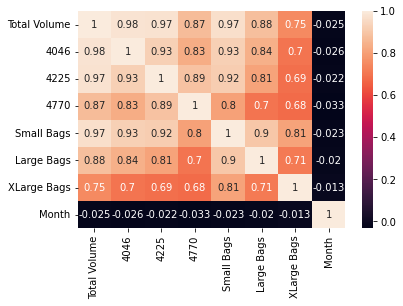

In [48]:
sns.heatmap(d.corr(),annot=True)

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(d)

In [50]:
scaled

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -0.22235202,
        -0.17557961,  1.64763162],
       [-0.23042664, -0.23110251, -0.20805446, ..., -0.22233464,
        -0.17557961,  1.64763162],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -0.22231148,
        -0.17557961,  1.64763162],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ..., -0.22256082,
        -0.17557961, -1.46495942],
       [-0.24162464, -0.2304279 , -0.24265143, ..., -0.2225293 ,
        -0.17557961, -1.46495942],
       [-0.24125273, -0.22934712, -0.24317042, ..., -0.22262764,
        -0.17557961, -1.46495942]])

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
VIF= pd.DataFrame()
VIF['features']= d.columns

In [53]:
VIF['vif']= [variance_inflation_factor(d.values,i) for i in range(len(d.columns))]

In [54]:
VIF

,features,vif
0,Total Volume,5.202516e+09
1,4046,6.933785e+08
2,4225,6.320930e+08
3,4770,4.963920e+06
4,Small Bags,2.426346e+08
5,Large Bags,2.569115e+07
6,XLarge Bags,1.326561e+05
7,Month,1.044053e+00


In [55]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


# Checking for Outliers

In [56]:
num= df.select_dtypes(np.number)

In [57]:
num.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

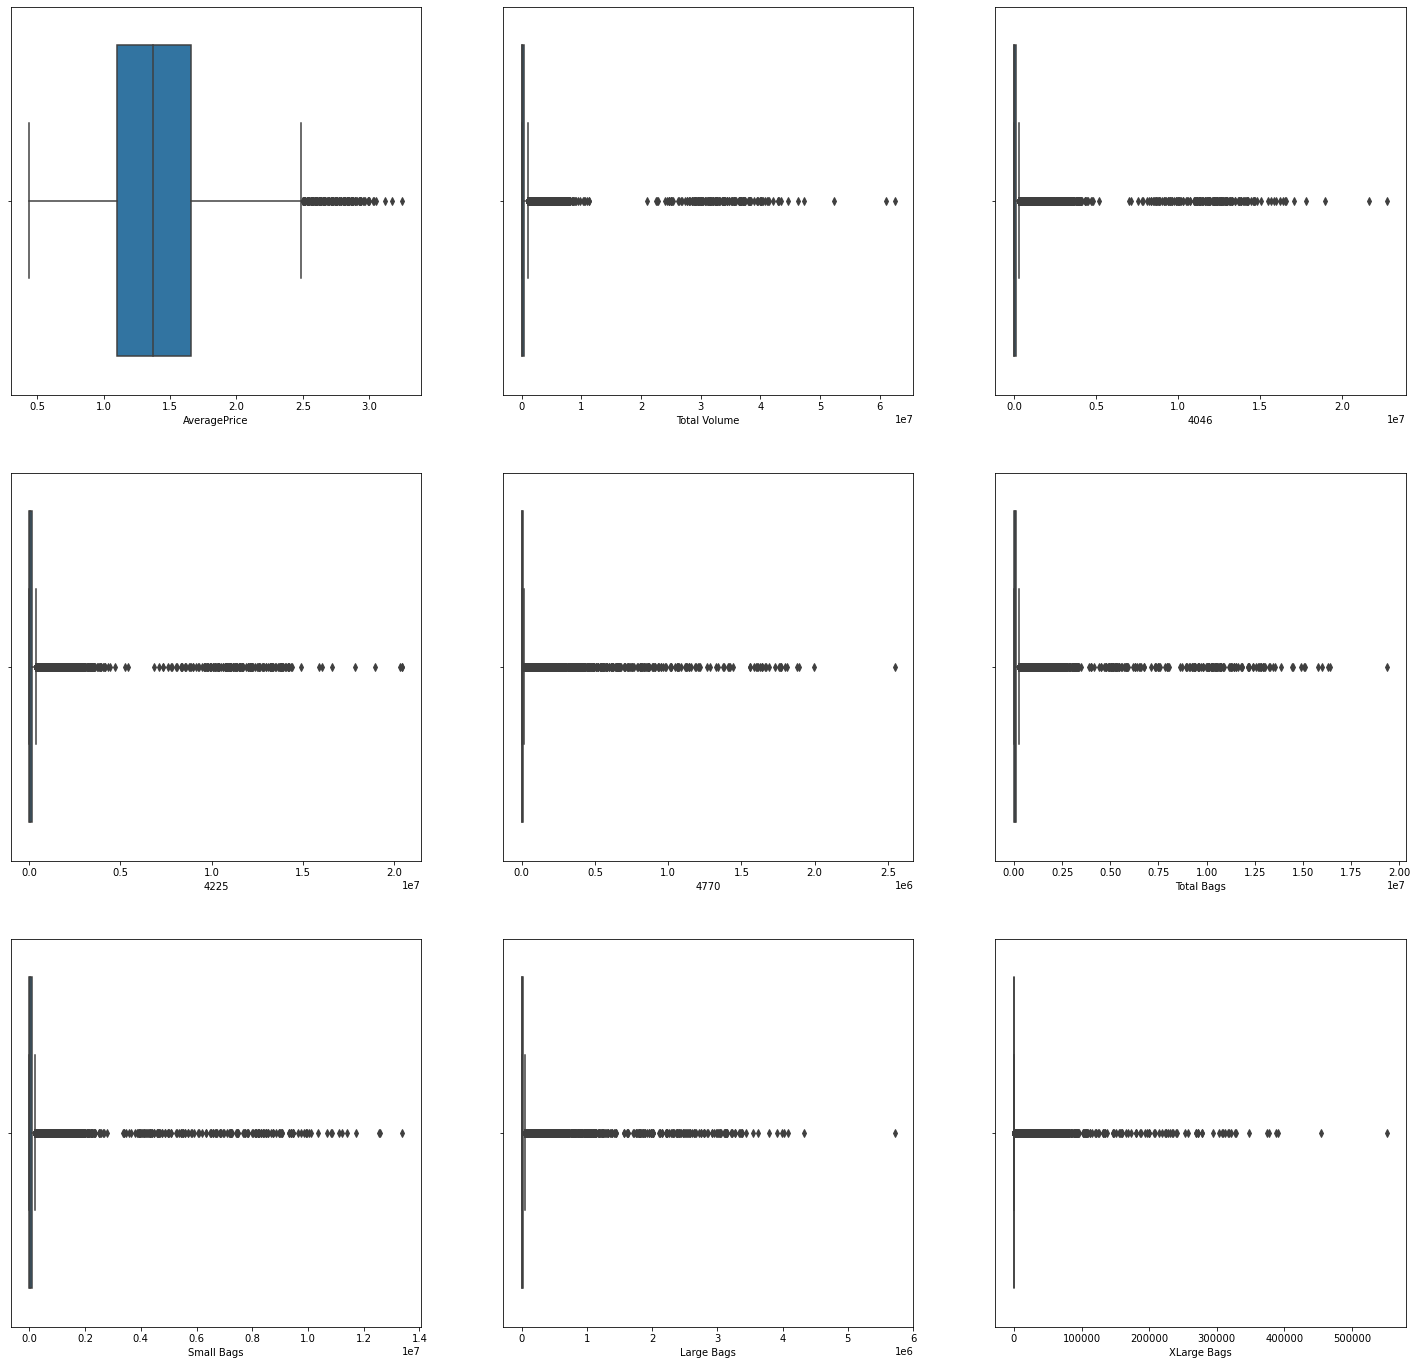

In [58]:
cont_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
plt.figure(figsize=(25,50))
for i in enumerate(df[cont_col]):
    plt.subplot(6,3,i[0]+1)
    sns.boxplot(df[i[1]])

all columns have outliers, except month & year

# ZScore Method

In [59]:
from scipy.stats import zscore

# calculate z score
z=np.abs(zscore(num))
threshold=3
print(np.where(z<3))
print(num.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [60]:
# assign the value to df_new which are less the threshold
data= df[(z<3).all(axis=1)]

In [61]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [62]:
data.shape

(17651, 14)

In [63]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",data.shape)
print("Total Dropped rows:",df.shape[0]-data.shape[0])
loss_percent=(df.shape[0]-data.shape[0])/df.shape[0]*100
print(loss_percent,"%")

Old DataFrame data in Rows and Column: (18249, 14)
New DataFrame data in Rows and Column: (17651, 14)
Total Dropped rows: 598
3.276891884486821 %


598 Rows droppped and 3.27% data

In [64]:
num_new=data.drop(['AveragePrice','Date','type','region'], axis=1)

In [65]:
num_new.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Month           0.107408
dtype: float64

In [66]:
num_new.head(2)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12


In [67]:
num_new.shape

(17651, 10)

In [68]:
Y=data['AveragePrice']

In [69]:
Y.shape

(17651,)

# Handling skewness

In [70]:
from sklearn.preprocessing import power_transform
transformed=power_transform(num_new)

transformed=pd.DataFrame(transformed)
transformed.columns=num_new.columns


transformed.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Month          -0.146554
dtype: float64

Skewness removed very well

In [71]:

transformed.head(3)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,1.491383
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,1.491383
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,1.491383


# PCA to handle Dimentionality Reduction

In [72]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(transformed)

In [73]:
from sklearn.decomposition import PCA
pca= PCA()

In [74]:
principal_component=pca.fit_transform(scaled)

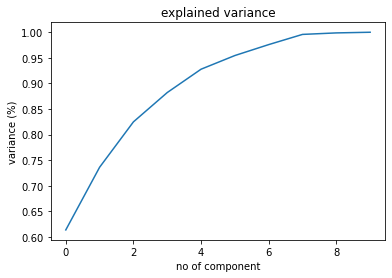

In [75]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of component')
plt.ylabel('variance (%)')
plt.title('explained variance')
plt.show()

In [76]:
pca=PCA(n_components=7)

In [77]:
new_data= pca.fit_transform(scaled)
principal_x= pd.DataFrame(new_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [78]:
principal_x

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.054280,-1.926906,-0.316834,-0.143358,0.500275,0.465078,-0.267559
1,-1.107373,-1.906494,-0.344648,-0.129888,0.486420,0.545947,-0.334382
2,-0.789543,-1.996824,-0.231603,-0.139444,0.529697,0.754814,-0.207641
3,-1.033615,-1.969558,-0.263836,-0.167128,0.374129,0.570255,-0.093852
4,-1.156035,-1.794040,-0.153531,-0.183083,0.252861,0.546405,-0.135038
...,...,...,...,...,...,...,...
17646,-1.600427,2.467002,-0.281279,-0.174348,0.535261,-0.404351,0.036870
17647,-1.741173,2.686826,0.090849,-0.080746,0.448342,-0.203622,0.015879
17648,-1.328701,2.398892,0.403804,0.490844,0.775516,0.781441,0.848922
17649,-1.191110,2.395605,0.409735,0.450230,0.811754,0.743474,0.831159


# Encoding of categoricl data

In [79]:
df['region'].nunique(), df['region'].unique()

(54,
 array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
        'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
        'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
        'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
        'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
        'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
        'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
        'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
        'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
        'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
        'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
        'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
        'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object))

In [80]:
cat= data[['type','region']]

In [81]:
!pip install category_encoders
import category_encoders as ce

Defaulting to user installation because normal site-packages is not writeable


In [82]:
import category_encoders as ce

In [83]:
#Encoding the type and region into digits
encoder= ce.BinaryEncoder(cols=['type','region'],return_df=True)

In [84]:
# Fit and Trabsform data

data_encoded= encoder.fit_transform(cat)

In [85]:
data_encoded

,type_0,type_1,region_0,region_1,region_2,region_3,region_4,region_5
0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
18244,1,0,1,1,0,1,0,1
18245,1,0,1,1,0,1,0,1
18246,1,0,1,1,0,1,0,1
18247,1,0,1,1,0,1,0,1


In [86]:
encoder_N= ce.BaseNEncoder(cols=['type','region'],return_df=True,base=5)

In [87]:
data_encoded_basen= encoder_N.fit_transform(cat)
data_encoded_basen

,type_0,region_0,region_1,region_2
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
18244,2,2,0,3
18245,2,2,0,3
18246,2,2,0,3
18247,2,2,0,3


In [88]:
# Standardize categorical data as well

sc= StandardScaler()
scaled_cat=sc.fit_transform(data_encoded_basen)

In [89]:
scaled_cat= pd.DataFrame(scaled_cat)
scaled_cat.columns= data_encoded_basen.columns

In [90]:
scaled_cat

,type_0,region_0,region_1,region_2
0,-1.019047,-1.002296,-1.284392,-0.727015
1,-1.019047,-1.002296,-1.284392,-0.727015
2,-1.019047,-1.002296,-1.284392,-0.727015
3,-1.019047,-1.002296,-1.284392,-0.727015
4,-1.019047,-1.002296,-1.284392,-0.727015
...,...,...,...,...
17646,0.981309,2.179062,-1.284392,0.698348
17647,0.981309,2.179062,-1.284392,0.698348
17648,0.981309,2.179062,-1.284392,0.698348
17649,0.981309,2.179062,-1.284392,0.698348


In [91]:
principal_x.shape  , scaled_cat.shape

((17651, 7), (17651, 4))

In [92]:
data_encoded.shape

(17651, 8)

In [93]:
X=pd.concat([principal_x,scaled_cat],axis=1,join='inner')

X1=pd.concat([principal_x,data_encoded],axis=1,join='inner')

In [94]:
X.shape, X1.shape

((17651, 11), (17053, 15))

In [95]:
Y= df['AveragePrice']

In [96]:
# remove records with outlier

Y= Y[(z<3).all(axis=1)]

In [97]:
X.shape , Y.shape

((17651, 11), (17651,))

# Splitting the data for training and testing:

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import  LinearRegression
LR=LinearRegression()


In [99]:
# Train Test Split / finding best random_state for my model

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=i,test_size=.3)
    LR.fit(x_train,y_train)
    train_pred=LR.predict(x_train)
    test_pred=LR.predict(x_test)
    if round(r2_score(y_test,test_pred),2)==round(r2_score(y_train,train_pred),2):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Test R2 score is: ", round(r2_score(y_test,test_pred),2))
        print('Train R2 score is: ', round(r2_score(y_train,train_pred),2))
        print('=='*50,'\n')

At random state  1 The model performance very well
At random state:  1
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  4 The model performance very well
At random state:  4
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  15 The model performance very well
At random state:  15
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  17 The model performance very well
At random state:  17
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  18 The model performance very well
At random state:  18
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  26 The model performance very well
At random state:  26
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  31 The model performance very well
At random state:  31
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  34 The model performance very well
At random state:  34
Test R2 score is:  0.5
Train R2 score is:  0.5

At random state  38 The model perfor

In [134]:
# Lets select random state= 100

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=125,test_size=.2)
LR.fit(x_train,y_train)


LinearRegression()

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model ]

In [104]:
for i in model:
    i.fit(x_train,y_train)
    print('mean_absolute_error of ',i ,'model', mean_absolute_error(y_test,i.predict(x_test)))
    print('mean_square_error of',i,'model' , mean_squared_error(y_test,i.predict(x_test)))
    print('R2 Score of',i,'model', r2_score(y_test,i.predict(x_test) )*100)
    print("==" * 50, '\n\n')

mean_absolute_error of  LinearRegression() model 0.21529728570707235
mean_square_error of LinearRegression() model 0.07463720416811824
R2 Score of LinearRegression() model 50.31251607225957


mean_absolute_error of  Ridge() model 0.21529608225309804
mean_square_error of Ridge() model 0.07463745379456618
R2 Score of Ridge() model 50.312349890926036


mean_absolute_error of  Lasso() model 0.31686782584322554
mean_square_error of Lasso() model 0.15021766584291213
R2 Score of Lasso() model -0.0029132980392088115


mean_absolute_error of  DecisionTreeRegressor() model 0.14191087613293052
mean_square_error of DecisionTreeRegressor() model 0.045993353474320244
R2 Score of DecisionTreeRegressor() model 69.38130203282253


mean_absolute_error of  SVR() model 0.1278306214786627
mean_square_error of SVR() model 0.02988298960794821
R2 Score of SVR() model 80.1062944089751


mean_absolute_error of  KNeighborsRegressor() model 0.10083534743202417
mean_square_error of KNeighborsRegressor() model 0.02

# CROSS Validation

In [105]:
from sklearn.model_selection import cross_val_score

for i in model:
    print('mean_square of ',i, 'model',mean_squared_error(y_test,i.predict(x_test)))
    print("cross Validation score of ",i ," is ",cross_val_score(i,X,Y,cv=10, scoring='neg_mean_squared_error').mean())
    print('=='*50)

mean_square of  LinearRegression() model 0.07463720416811824
cross Validation score of  LinearRegression()  is  -0.0802909169410363
mean_square of  Ridge() model 0.07463745379456618
cross Validation score of  Ridge()  is  -0.08028992273078471
mean_square of  Lasso() model 0.15021766584291213
cross Validation score of  Lasso()  is  -0.16258283136561785
mean_square of  DecisionTreeRegressor() model 0.045993353474320244
cross Validation score of  DecisionTreeRegressor()  is  -0.10388943292727922
mean_square of  SVR() model 0.02988298960794821
cross Validation score of  SVR()  is  -0.06760709545452463
mean_square of  KNeighborsRegressor() model 0.020993947129909363
cross Validation score of  KNeighborsRegressor()  is  -0.09096348918078018
mean_square of  RandomForestRegressor() model 0.020606040507930513
cross Validation score of  RandomForestRegressor()  is  -0.052164106797416086
mean_square of  ElasticNet() model 0.14294769920027084
cross Validation score of  ElasticNet()  is  -0.1556073

mean_square of  SGDRegressor() model 0.08239329509185805

cross Validation score of  SGDRegressor()  is  -0.08771725502019286

# Hyper Parameter Tuning

In [107]:
params={'penalty':['l2','l1','elasticnet'],
       'alpha':[1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06],
        'loss':['squared_loss', 'huber', 'epsilon_insensitive'],
       'learning_rate':['constant','optimal','invscaling']}

In [108]:
from sklearn.model_selection import GridSearchCV


GCV= GridSearchCV(SGH_model,params,cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [109]:
GCV.best_params_

{'alpha': 1e-05,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'penalty': 'elasticnet'}

In [113]:
GCV_pred1= GCV.best_estimator_.predict(x_test)
mean_squared_error(y_test,GCV_pred)

0.07475070814323118

# Saving The Model

In [117]:
#Saving the model using .pkl
import joblib
joblib.dump(GCV_pred1,"Avacado_price.pkl")

['Avacado_price.pkl']

# Prediction with Test Dataset

In [ ]:
#Loading the saved model
GCV_pred1=joblib.load("Avacado_price.pkl")

#Prediction
prediction = GCV_pred1.predict(x_test)
prediction